In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/InfosysMain/mediscan-env')
print(os.getcwd())


/content/drive/MyDrive/InfosysMain/mediscan-env


In [ ]:
!pip install \
numpy \
pandas \
opencv-python \
keras \
tensorflow \
pillow \
matplotlib \
scikit-learn \
scikit-image \
scipy

In [4]:
import os
import numpy as np
import pandas as pd
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


In [5]:
data = []
result = []
def load_images(path):
    l1 = os.listdir(path)
#     print(l1)
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size=(256,256))
            data.append(np.array(img))
            result.append(i)
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(5, 4, i+1)
        plt.imshow(data[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(data),result

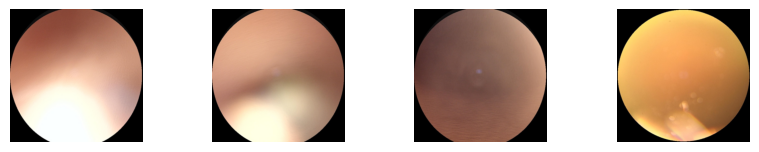

In [6]:
data,result = load_images("data/raw/dataset/")

In [7]:
data

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

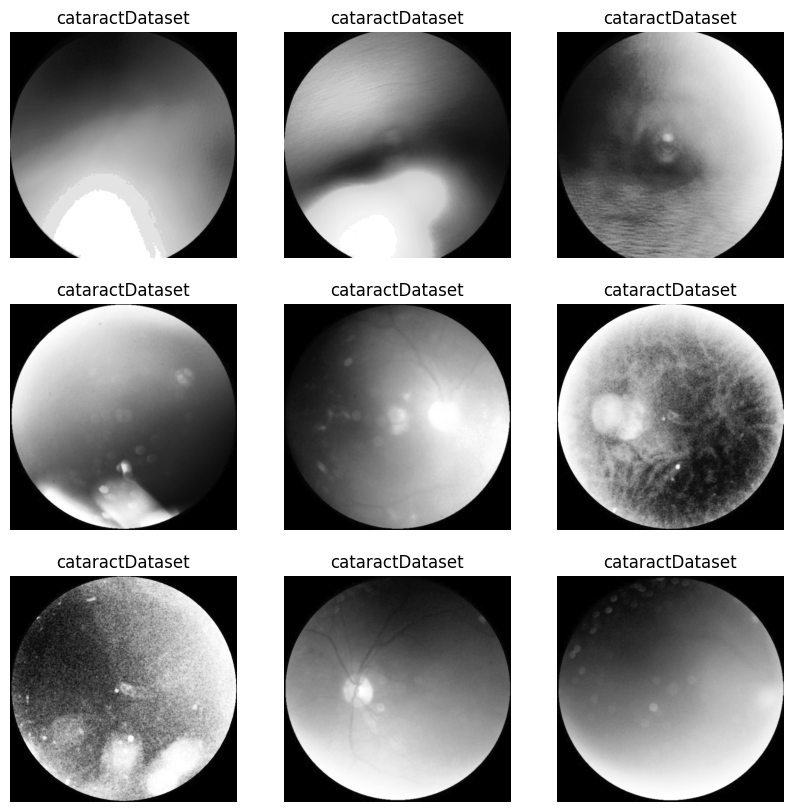

In [8]:
data_dir = 'data/raw/dataset/'

def preprocess_image(image):
    # Convert to grayscale if the image is in color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Noise Reduction using Gaussian Blur
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Image Enhancement using Histogram Equalization
    image = cv2.equalizeHist(image)

    # Normalization to the range [0, 1]
    image = image / 255.0

    return image

def load_and_preprocess_images(data_dir):
    images = []
    labels = []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_path = os.path.join(category_path, file)
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, (512, 512))
                    image = preprocess_image(image)
                    images.append(image)
                    labels.append(category)
    return np.array(images), np.array(labels)

# Load and preprocess the images
images, labels = load_and_preprocess_images(data_dir)

# Display some preprocessed images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [9]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

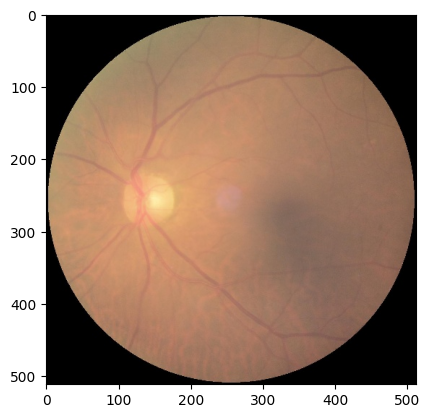

In [11]:
image = plt.imread('data/raw/dataset/cataractDataset/1102_left.jpg')
image.shape
plt.imshow(image)

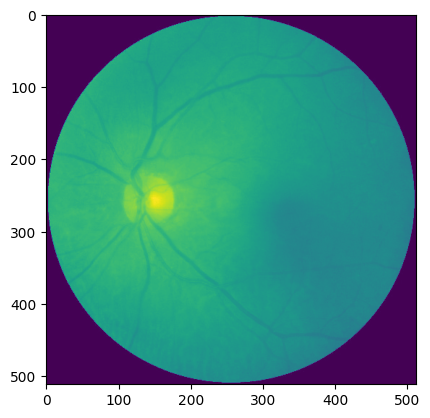

In [12]:
gray = rgb2gray(image)
plt.imshow(gray)

In [13]:

import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray


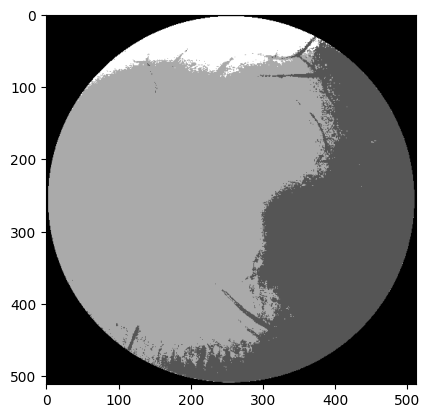

In [14]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [15]:
gray.shape

(512, 512)

In [17]:
t = pd.Series(result,dtype='category').cat.codes

In [18]:
t

,0
0,0
1,0
2,0
3,0
4,0
...,...
4212,3
4213,3
4214,3
4215,3


In [19]:
x_train , x_test , y_train , y_test = train_test_split(data ,t , test_size = 0.10 , shuffle = True , random_state = 10)

In [20]:
print("x_train Shape : ", x_train.shape)
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

x_train Shape :  (3795, 256, 256, 3)
x_test Shape :  (422, 256, 256, 3)
y_train Shape:  (3795,)
y_test Shape:  (422,)


In [21]:
import tensorflow.keras as K

In [22]:
input_v = K.Input(shape=(256,256,3))

In [23]:
modelVGG = VGG16(include_top = False,weights ='imagenet',input_tensor = input_v)

58889256/58889256 [==============================] - 0s 0us/step


In [24]:
for layer in modelVGG.layers:
    layer.trainable = False


In [25]:
num_classes = 4
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(4096,activation='relu')(top_model)
        top_model = Dropout(0.625, name='dropout_1')(top_model)
        top_model = Dense(4096,activation='relu')(top_model)
        top_model = Dense(4,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [26]:
num_classes = 4
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [28]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [29]:
history = model.fit(x_train , y_train , epochs = 8, validation_data = (x_test , y_test), verbose = 1)

Epoch 1/8
119/119 [==============================] - 107s 893ms/step - loss: 1.0416 - accuracy: 0.7444 - val_loss: 0.4443 - val_accuracy: 0.8104
Epoch 2/8
119/119 [==============================] - 107s 897ms/step - loss: 0.4659 - accuracy: 0.8279 - val_loss: 0.3778 - val_accuracy: 0.8578
Epoch 3/8
119/119 [==============================] - 107s 897ms/step - loss: 0.4157 - accuracy: 0.8440 - val_loss: 0.3889 - val_accuracy: 0.8460
Epoch 4/8
119/119 [==============================] - 107s 896ms/step - loss: 0.4107 - accuracy: 0.8487 - val_loss: 0.3247 - val_accuracy: 0.8839
Epoch 5/8
119/119 [==============================] - 106s 890ms/step - loss: 0.3884 - accuracy: 0.8556 - val_loss: 0.3313 - val_accuracy: 0.8791
Epoch 6/8
119/119 [==============================] - 107s 901ms/step - loss: 0.3413 - accuracy: 0.8717 - val_loss: 0.3898 - val_accuracy: 0.8270
Epoch 7/8
119/119 [==============================] - 107s 901ms/step - loss: 0.3381 - accuracy: 0.8690 - val_loss: 0.3321 - val_ac

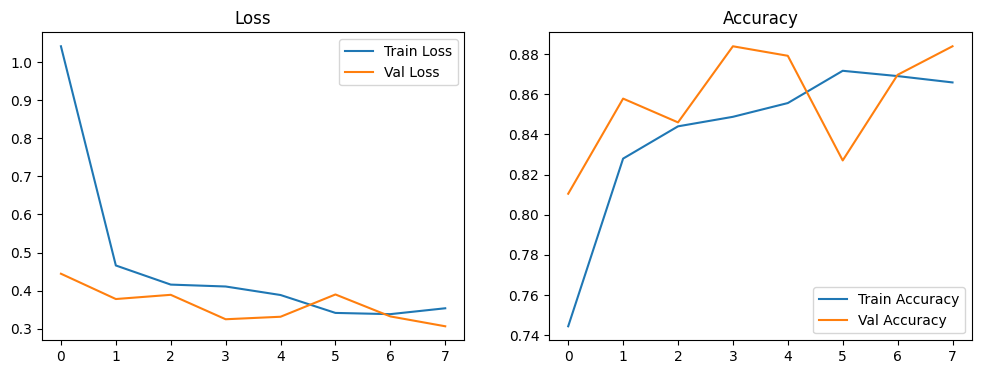

In [30]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [31]:
loss,aac = model.evaluate(x_train,y_train)
loss,aac = model.evaluate(x_test,y_test)

14/14 [==============================] - 10s 695ms/step - loss: 0.3063 - accuracy: 0.8839


In [32]:
def names(number):
    if number==0:
        return "Cataract"
    elif number==1:
        return "diabetic_retinopathy"
    elif number==2:
        return "glaucoma"
    elif number==3:
        return "normal"

In [33]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((256,256)))
    x = x.reshape(1,256,256,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

95.64212560653687% Confidence Cataract


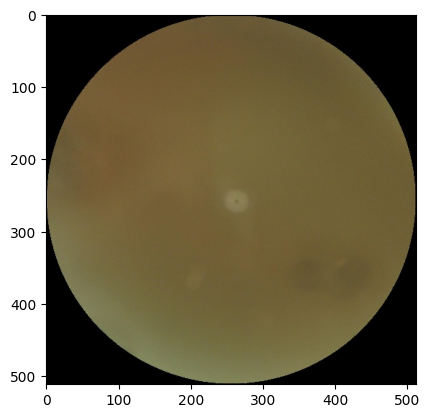

In [34]:
img = Image.open(r"data/raw/dataset/cataractDataset/0_left.jpg")
Prediction(img)

100.0% Confidence diabetic_retinopathy


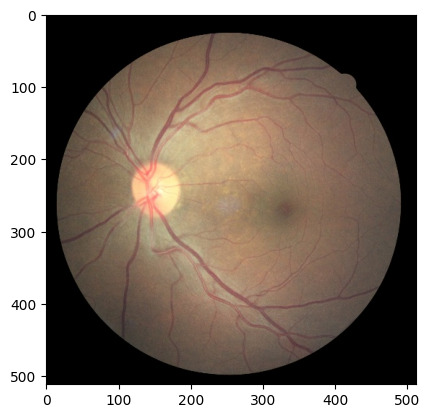

In [35]:
img = Image.open(r"data/raw/dataset/diabetic_retinopathy/10003_left.jpeg")
Prediction(img)

53.66220474243164% Confidence glaucoma


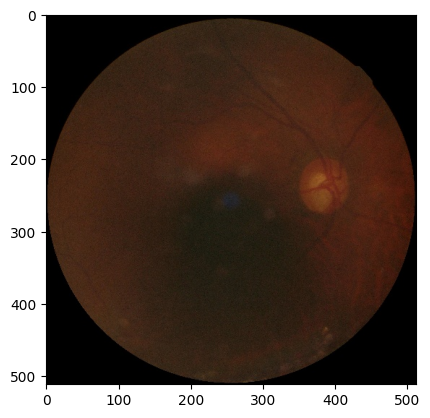

In [36]:
img = Image.open(r"data/raw/dataset/glaucoma/1210_right.jpg")
Prediction(img)

89.51265811920166% Confidence normal


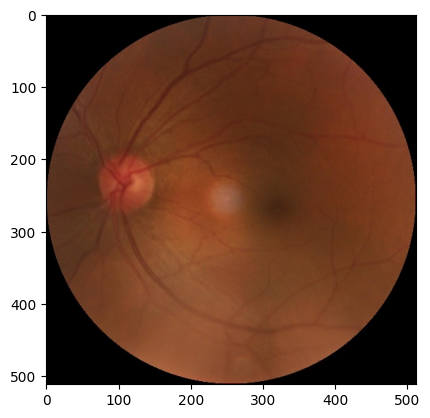

In [37]:
img = Image.open(r"data/raw/dataset/normal/2329_left.jpg")
Prediction(img)

In [39]:
model.save('mediscan_model.keras')